In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
train = pd.read_csv("titanic_train.csv")


In [3]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Age']=train['Age'].fillna(method='ffill')

<Axes: >

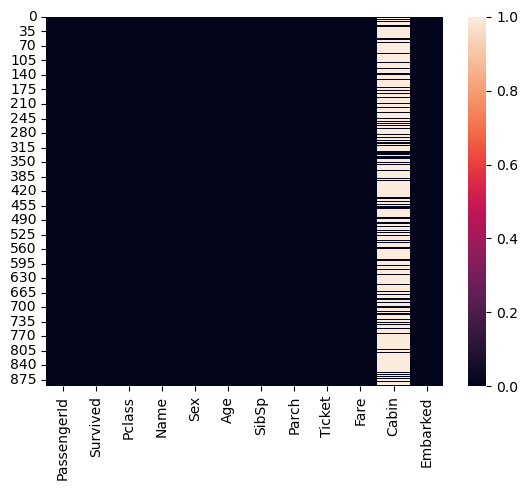

In [6]:
sns.heatmap(train.isnull())

In [7]:
train.drop('Cabin',axis = 1, inplace = True)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
sex = pd.get_dummies(train['Sex'])

In [10]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1, inplace = True)

In [11]:
sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train.drop('Survived', axis = 1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,19.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [14]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis = 1),train['Survived'], test_size = 0.30,
                                                   random_state = 101)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

D:\anaconda 1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
prediction = logmodel.predict(x_test)

In [18]:
prediction

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       154
           1       0.73      0.40      0.52       114

    accuracy                           0.68       268
   macro avg       0.70      0.65      0.64       268
weighted avg       0.69      0.68      0.66       268



In [21]:
print(confusion_matrix(y_test,prediction))

[[137  17]
 [ 68  46]]


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
predict_tree = dtree.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,prediction))

[[137  17]
 [ 68  46]]


In [28]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       154
           1       0.73      0.40      0.52       114

    accuracy                           0.68       268
   macro avg       0.70      0.65      0.64       268
weighted avg       0.69      0.68      0.66       268



In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
rfc_pred = rfc.predict(x_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[125  29]
 [ 55  59]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       154
           1       0.67      0.52      0.58       114

    accuracy                           0.69       268
   macro avg       0.68      0.66      0.67       268
weighted avg       0.68      0.69      0.68       268



In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
pred = knn.predict(x_test)

In [37]:
pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [42]:
from sklearn.metrics import classification_report.confusion_matrix

SyntaxError: invalid syntax (1864776412.py, line 1)

In [43]:
print('WITH K=6')
print('\n')


WITH K=6




In [44]:
print(confusion_matrix(y_test,pred))

[[107  47]
 [ 65  49]]


In [45]:
nn = KNeighborsClassifier(n_neighbors=6)
nn.fit(x_train,y_train)
pred = nn.predict(x_test)

In [46]:
print(confusion_matrix(y_test,pred))

[[135  19]
 [ 85  29]]


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()


In [49]:
scaler.fit(train.drop('Survived',axis=1))

StandardScaler()

In [50]:
scaled_features = scaler.transform(train.drop('Survived',axis=1))

In [59]:
df_feat = pd.DataFrame(scaled_features,columns = ['PassengerId','Pclass','age','sipsb','parch','fair'])

In [60]:
df_feat.head()

,PassengerId,Pclass,age,sipsb,parch,fair
0,-1.730108,0.827377,-0.521198,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,0.578729,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-0.246216,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,0.372493,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.372493,-0.474545,-0.473674,-0.486337


In [54]:
from sklearn.svm import SVC

In [55]:
model = SVC()

In [56]:
model.fit(x_train,y_train)

SVC()

In [57]:
predict_svc = model.predict(x_test)

In [58]:
print(confusion_matrix(y_test,predict_svc))

[[150   4]
 [101  13]]


In [3]:
data = sns.load_dataset("iris")

In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

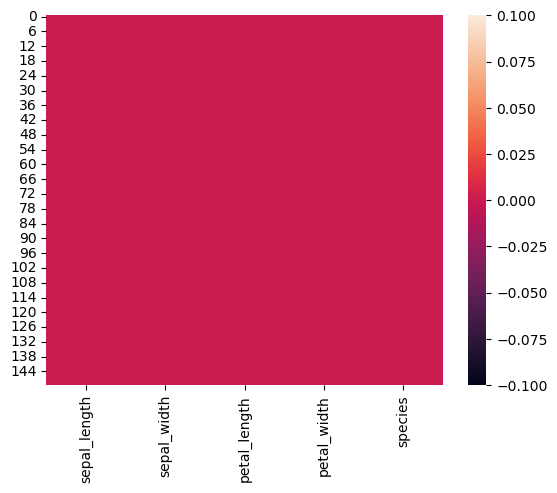

In [6]:
sns.heatmap(data.isnull())

In [10]:
x = data.drop(['species'],axis = 1)
y = data['species']

In [12]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix